In [ ]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [ ]:
import urllib

In [ ]:
from urllib.request import urlretrieve
urlretrieve(URL,'data.csv')

In [ ]:
csv = urllib.urlretrieve(URL,'data.csv')

In [ ]:
!head data.csv

In [ ]:
csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [4]:
df.shape

(45984, 2)

In [5]:
df.tail()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2017-12-31 19:00:00,9.0,12.0
2017-12-31 20:00:00,6.0,8.0
2017-12-31 21:00:00,3.0,10.0
2017-12-31 22:00:00,7.0,6.0
2017-12-31 23:00:00,7.0,9.0


In [6]:
df.dropna(inplace=True)

df.shape

(45976, 2)

In [7]:
import ssl
ssl.OPENSSL_VERSION

'OpenSSL 1.0.2k  26 Jan 2017'

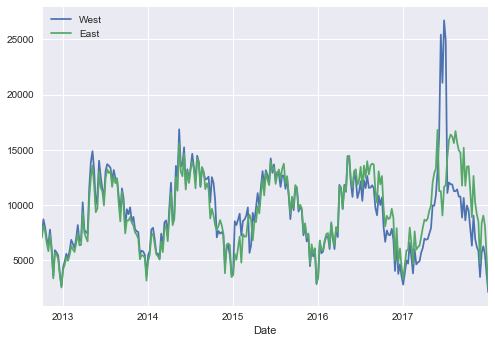

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.columns = ['West','East']

plt.style.use('seaborn')
df.resample('w').sum().plot();

(0, 1488.711780821918)

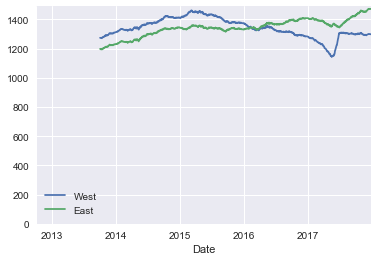

In [9]:
ax = df.resample('d').sum().rolling(365).mean().plot();#历年来的每日平均值
ax.set_ylim(0)

In [10]:
df['sum'] = df['West'] + df['East']

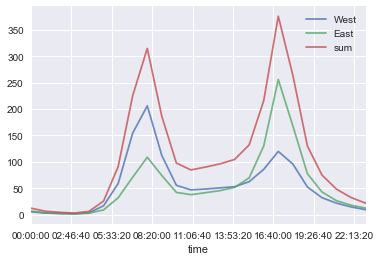

In [11]:
df.groupby(df.index.time).mean().plot(alpha=0.8); #所有数据的24小时平均值

In [12]:
pivot = df.pivot_table('sum',index=df.index.time,columns=df.index.date)

In [13]:
pivot.iloc[:4,:4] #透视表

,2012-10-03,2012-10-04,2012-10-05,2012-10-06
00:00:00,13.0,18.0,11.0,15.0
01:00:00,10.0,3.0,8.0,15.0
02:00:00,2.0,9.0,7.0,9.0
03:00:00,5.0,3.0,4.0,3.0


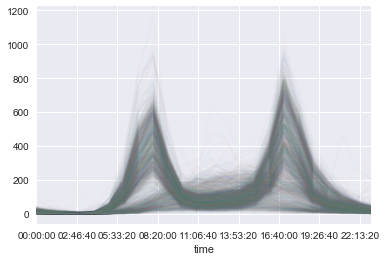

In [14]:
pivot.plot(alpha=0.02,legend=False);

In [15]:
pivot.shape

(24, 1916)

In [16]:
import numpy as np

In [17]:
len(np.unique(pivot.index)) #24小时

24

In [18]:
pivot.T.values.shape

(1916, 24)

In [19]:
pivot_T = pivot.T.fillna(0).values #用values取出数值矩阵

In [20]:
from sklearn.decomposition import PCA
pca = PCA(2,svd_solver='full') #需要降为2个维度

In [21]:
X = pca.fit_transform(pivot_T)

In [22]:
X.shape

(1916, 2)

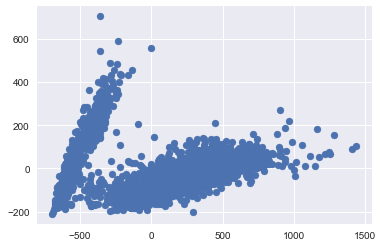

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])

In [24]:
from sklearn.mixture import GaussianMixture #混合高斯
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)

In [25]:
labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

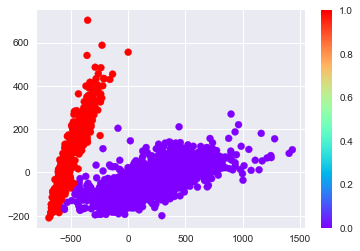

In [26]:
plt.scatter(X[:,0],X[:,1],c = labels,cmap='rainbow');
plt.colorbar();

In [27]:
pivot.T.head()

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2012-10-03,13.0,10.0,2.0,5.0,7.0,31.0,155.0,352.0,437.0,276.0,...,128.0,164.0,315.0,583.0,380.0,128.0,80.0,63.0,49.0,17.0
2012-10-04,18.0,3.0,9.0,3.0,8.0,26.0,142.0,319.0,418.0,241.0,...,119.0,147.0,275.0,507.0,378.0,164.0,83.0,70.0,46.0,41.0
2012-10-05,11.0,8.0,7.0,4.0,9.0,25.0,105.0,319.0,370.0,212.0,...,125.0,164.0,310.0,434.0,316.0,115.0,68.0,42.0,36.0,32.0
2012-10-06,15.0,15.0,9.0,3.0,5.0,5.0,27.0,33.0,105.0,114.0,...,203.0,211.0,183.0,180.0,96.0,78.0,43.0,33.0,34.0,34.0
2012-10-07,11.0,17.0,3.0,6.0,3.0,9.0,17.0,26.0,69.0,103.0,...,241.0,231.0,225.0,191.0,113.0,49.0,55.0,47.0,18.0,16.0


#将每天的数据分为两类：

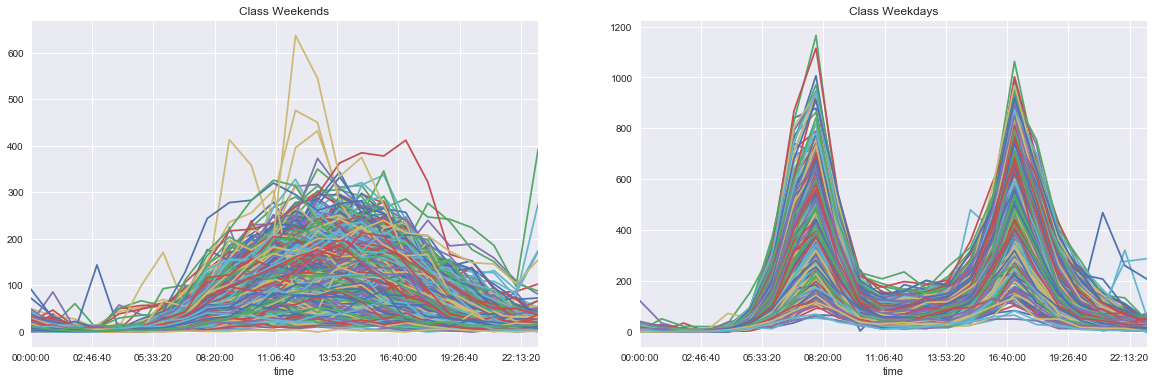

In [41]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

ax[0].set_title('Class Weekends')
ax[1].set_title('Class Weekdays')
pivot.T[labels==1].T.plot(legend=False,ax = ax[0]);

pivot.T[labels==0].T.plot(legend=False,ax = ax[1]);

In [29]:
days = pd.DatetimeIndex(pivot.columns).dayofweek

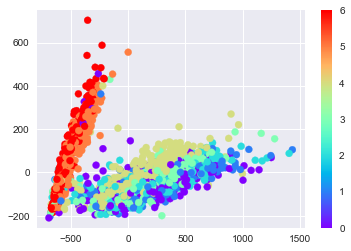

In [30]:
plt.scatter(X[:,0],X[:,1],c=days,cmap='rainbow');
plt.colorbar();

In [31]:
dates = pd.DataFrame(pd.DatetimeIndex(pivot.columns))
dates.head()

,0
0,2012-10-03
1,2012-10-04
2,2012-10-05
3,2012-10-06
4,2012-10-07


In [32]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = pd.to_datetime(cal.holidays(start=dates[0].min(), end=dates[0].max()))
#dates['isHoliday'] = dates[0].isin(holidays)
pd.to_datetime(dates[0])
dates.index = dates[0]
dates['isHoliday'] = (dates.index.weekday>=5) | (dates[0].isin(holidays)) #公共假期和周末为True
print(dates[dates['isHoliday']==True])

                    0  isHoliday
0                               
2012-10-06 2012-10-06       True
2012-10-07 2012-10-07       True
2012-10-08 2012-10-08       True
2012-10-13 2012-10-13       True
2012-10-14 2012-10-14       True
2012-10-20 2012-10-20       True
2012-10-21 2012-10-21       True
2012-10-27 2012-10-27       True
2012-10-28 2012-10-28       True
2012-11-03 2012-11-03       True
2012-11-04 2012-11-04       True
2012-11-10 2012-11-10       True
2012-11-11 2012-11-11       True
2012-11-12 2012-11-12       True
2012-11-17 2012-11-17       True
2012-11-18 2012-11-18       True
2012-11-22 2012-11-22       True
2012-11-24 2012-11-24       True
2012-11-25 2012-11-25       True
2012-12-01 2012-12-01       True
2012-12-02 2012-12-02       True
2012-12-08 2012-12-08       True
2012-12-09 2012-12-09       True
2012-12-15 2012-12-15       True
2012-12-16 2012-12-16       True
2012-12-22 2012-12-22       True
2012-12-23 2012-12-23       True
2012-12-25 2012-12-25       True
2012-12-29

In [33]:
len(dates[labels==1]) 

596

In [34]:
len(dates[labels==0])

1320

In [43]:
dates[labels==1]['isHoliday'].sum()/len(dates[labels==1])#绝大多数1类的都是假期

0.016666666666666666

In [44]:
dates[labels==0]['isHoliday'].sum()/len(dates[labels==0])#绝大多数0类的都是不是假期

0.016666666666666666

In [45]:
not_holiday_label1 = dates[(labels==1) & (dates['isHoliday']==False)] #1类中，不是假期的日子

In [46]:
len(not_holiday_label1)

16

In [47]:
not_holiday_label1

,0,isHoliday
0,,
2012-11-23,2012-11-23,False
2012-12-24,2012-12-24,False
2012-12-31,2012-12-31,False
2013-11-29,2013-11-29,False
2013-12-24,2013-12-24,False
2014-11-28,2014-11-28,False
2014-12-24,2014-12-24,False
2014-12-26,2014-12-26,False
2015-11-27,2015-11-27,False
